In [1]:
import pandas as pd
import numpy as np
from datetime import date
import calendar
# pip install linearmodels
from linearmodels.panel import PanelOLS
import numpy as np
import matplotlib.pyplot as plt
import math

import  matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [7]:
#source: https://www.bsg.ox.ac.uk/research/publications/variation-government-responses-covid-19

xls = pd.ExcelFile(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\OxCGRT\OxCGRT_timeseries_all.xlsx')

## Create dataset for policy stringency and specific measures 

stringency = pd.read_excel(xls, 'stringency_index')
stringency = stringency.T
stringency.drop('country_code', inplace=True)
stringency.columns = stringency.iloc[0]
stringency.drop('country_name', inplace=True)
stringency.index = pd.to_datetime(stringency.index)
stringency.ffill(axis = 0) 
stringency = stringency.T.stack() 
stringency = stringency.to_frame() #convert series to dataframe
stringency.reset_index(inplace=True)  #split multirow
stringency.columns = ['country','date','stringency'] #rename columns


stay_home = pd.read_excel(xls, 'c6_stay_at_home_requirements')
stay_home = stay_home.T
stay_home.drop('country_code', inplace=True)
stay_home.columns = stay_home.iloc[0]
stay_home.drop('country_name', inplace=True)


In [9]:
#source: https://www.bsg.ox.ac.uk/research/publications/variation-government-responses-covid-19

xls = pd.ExcelFile(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\OxCGRT\C84B1850.xlsx')

## Create dataset for policy stringency and specific measures 

stringency = pd.read_excel(xls, 'stringency_index')
stringency = stringency.T
stringency.drop('country_code', inplace=True)
stringency.columns = stringency.iloc[0]
stringency.drop('country_name', inplace=True)
stringency.index = pd.to_datetime(stringency.index)
stringency.ffill(axis = 0) 
stringency = stringency.T.stack() 
stringency = stringency.to_frame() #convert series to dataframe
stringency.reset_index(inplace=True)  #split multirow
stringency.columns = ['country','date','stringency'] #rename columns


stay_home = pd.read_excel(xls, 'c6_stay_at_home_requirements')
stay_home = stay_home.T
stay_home.drop('country_code', inplace=True)
stay_home.columns = stay_home.iloc[0]
stay_home.drop('country_name', inplace=True)
stay_home.index = pd.to_datetime(stay_home.index)
stay_home.ffill(axis = 0) 
stay_home = stay_home.T.stack() 
stay_home = stay_home.to_frame() #convert series to dataframe
stay_home.reset_index(inplace=True)  #split multirow
stay_home.columns = ['country','date','stay_home'] #rename columns

stay_home_f = pd.read_excel(xls, 'c6_flag')
stay_home_f = stay_home_f.T
stay_home_f.drop('country_code', inplace=True)
stay_home_f.columns = stay_home_f.iloc[0]
stay_home_f.drop('country_name', inplace=True)
stay_home_f.index = pd.to_datetime(stay_home_f.index)
stay_home_f.ffill(axis = 0) 
stay_home_f = stay_home_f.T.stack() 
stay_home_f = stay_home_f.to_frame() #convert series to dataframe
stay_home_f.reset_index(inplace=True)  #split multirow
stay_home_f.columns = ['country','date','f_stay_home'] #rename columns
stay_home_f['f_stay_home']= pd.to_numeric(stay_home_f['f_stay_home'])

close_transport = pd.read_excel(xls, 'c5_close_public_transport')
close_transport = close_transport.T
close_transport.drop('country_code', inplace=True)
close_transport.columns = close_transport.iloc[0]
close_transport.drop('country_name', inplace=True)
close_transport.index = pd.to_datetime(close_transport.index)
close_transport.ffill(axis = 0) 
close_transport = close_transport.T.stack() 
close_transport = close_transport.to_frame() #convert series to dataframe
close_transport.reset_index(inplace=True)  #split multirow
close_transport.columns = ['country','date','close_transport'] #rename columns

close_transport_f = pd.read_excel(xls, 'c5_flag')
close_transport_f = close_transport_f.T
close_transport_f.drop('country_code', inplace=True)
close_transport_f.columns = close_transport_f.iloc[0]
close_transport_f.drop('country_name', inplace=True)
close_transport_f.index = pd.to_datetime(close_transport_f.index)
close_transport_f.ffill(axis = 0) 
close_transport_f = close_transport_f.T.stack() 
close_transport_f = close_transport_f.to_frame() #convert series to dataframe
close_transport_f.reset_index(inplace=True)  #split multirow
close_transport_f.columns = ['country','date','f_close_transport'] #rename columns
close_transport_f['f_close_transport']=pd.to_numeric(close_transport_f['f_close_transport'])

gatherings = pd.read_excel(xls, 'c4_restrictions_on_gatherings')
gatherings = gatherings.T
gatherings.drop('country_code', inplace=True)
gatherings.columns = gatherings.iloc[0]
gatherings.drop('country_name', inplace=True)
gatherings.index = pd.to_datetime(gatherings.index)
gatherings.ffill(axis = 0) 
gatherings = gatherings.T.stack() 
gatherings = gatherings.to_frame() #convert series to dataframe
gatherings.reset_index(inplace=True)  #split multirow
gatherings.columns = ['country','date','gatherings'] #rename columns

gatherings_f = pd.read_excel(xls, 'c4_flag')
gatherings_f = gatherings_f.T
gatherings_f.drop('country_code', inplace=True)
gatherings_f.columns = gatherings_f.iloc[0]
gatherings_f.drop('country_name', inplace=True)
gatherings_f.index = pd.to_datetime(gatherings_f.index)
gatherings_f.ffill(axis = 0) 
gatherings_f = gatherings_f.T.stack() 
gatherings_f = gatherings_f.to_frame() #convert series to dataframe
gatherings_f.reset_index(inplace=True)  #split multirow
gatherings_f.columns = ['country','date','f_gatherings'] #rename columns
gatherings_f['f_gatherings'] = pd.to_numeric(gatherings_f['f_gatherings'])

close_work = pd.read_excel(xls, 'c2_workplace_closing')
close_work = close_work.T
close_work.drop('country_code', inplace=True)
close_work.columns = close_work.iloc[0]
close_work.drop('country_name', inplace=True)
close_work.index = pd.to_datetime(close_work.index)
close_work.ffill(axis = 0) 
close_work = close_work.T.stack() 
close_work = close_work.to_frame() #convert series to dataframe
close_work.reset_index(inplace=True)  #split multirow
close_work.columns = ['country','date','close_work'] #rename columns

close_work_f = pd.read_excel(xls, 'c2_flag')
close_work_f = close_work_f.T
close_work_f.drop('country_code', inplace=True)
close_work_f.columns = close_work_f.iloc[0]
close_work_f.drop('country_name', inplace=True)
close_work_f.index = pd.to_datetime(close_work_f.index)
close_work_f.ffill(axis = 0) 
close_work_f = close_work_f.T.stack() 
close_work_f = close_work_f.to_frame() #convert series to dataframe
close_work_f.reset_index(inplace=True)  #split multirow
close_work_f.columns = ['country','date','f_close_work'] #rename columns
close_work_f['f_close_work'] = pd.to_numeric(close_work_f['f_close_work'])


cancel_event = pd.read_excel(xls, 'c3_cancel_public_events')
cancel_event = cancel_event.T
cancel_event.drop('country_code', inplace=True)
cancel_event.columns = cancel_event.iloc[0]
cancel_event.drop('country_name', inplace=True)
cancel_event.index = pd.to_datetime(cancel_event.index)
cancel_event.ffill(axis = 0) 
cancel_event = cancel_event.T.stack() 
cancel_event = cancel_event.to_frame() #convert series to dataframe
cancel_event.reset_index(inplace=True)  #split multirow
cancel_event.columns = ['country','date','cancel_event'] #rename columns

cancel_event_f = pd.read_excel(xls, 'c3_flag')
cancel_event_f = cancel_event_f.T
cancel_event_f.drop('country_code', inplace=True)
cancel_event_f.columns = cancel_event_f.iloc[0]
cancel_event_f.drop('country_name', inplace=True)
cancel_event_f.index = pd.to_datetime(cancel_event_f.index)
cancel_event_f.ffill(axis = 0) 
cancel_event_f = cancel_event_f.T.stack() 
cancel_event_f = cancel_event_f.to_frame() #convert series to dataframe
cancel_event_f.reset_index(inplace=True)  #split multirow
cancel_event_f.columns = ['country','date','f_cancel_event'] #rename columns
cancel_event_f['f_cancel_event'] = pd.to_numeric(cancel_event_f['f_cancel_event'])

close_school = pd.read_excel(xls, 'c1_school_closing')
close_school = close_school.T
close_school.drop('country_code', inplace=True)
close_school.columns = close_school.iloc[0]
close_school.drop('country_name', inplace=True)
close_school.index = pd.to_datetime(close_school.index)
close_school.ffill(axis = 0) 
close_school = close_school.T.stack() 
close_school = close_school.to_frame() #convert series to dataframe
close_school.reset_index(inplace=True)  #split multirow
close_school.columns = ['country','date','close_school'] #rename columns

close_school_f = pd.read_excel(xls, 'c1_flag')
close_school_f = close_school_f.T
close_school_f.drop('country_code', inplace=True)
close_school_f.columns = close_school_f.iloc[0]
close_school_f.drop('country_name', inplace=True)
close_school_f.index = pd.to_datetime(close_school_f.index)
close_school_f.ffill(axis = 0) 
close_school_f = close_school_f.T.stack() 
close_school_f = close_school_f.to_frame() #convert series to dataframe
close_school_f.reset_index(inplace=True)  #split multirow
close_school_f.columns = ['country','date','f_close_school'] #rename columns
close_school_f['f_close_school'] = pd.to_numeric(close_school_f['f_close_school'])

close_move = pd.read_excel(xls, 'c7_movementrestrictions')
close_move = close_move.T
close_move.drop('country_code', inplace=True)
close_move.columns = close_move.iloc[0]
close_move.drop('country_name', inplace=True)
close_move.index = pd.to_datetime(close_move.index)
close_move.ffill(axis = 0) 
close_move = close_move.T.stack() 
close_move = close_move.to_frame() #convert series to dataframe
close_move.reset_index(inplace=True)  #split multirow
close_move.columns = ['country','date','close_move'] #rename columns

close_move_f = pd.read_excel(xls, 'c7_flag')
close_move_f = close_move_f.T
close_move_f.drop('country_code', inplace=True)
close_move_f.columns = close_move_f.iloc[0]
close_move_f.drop('country_name', inplace=True)
close_move_f.index = pd.to_datetime(close_move_f.index)
close_move_f.ffill(axis = 0) 
close_move_f = close_move_f.T.stack() 
close_move_f = close_move_f.to_frame() #convert series to dataframe
close_move_f.reset_index(inplace=True)  #split multirow
close_move_f.columns = ['country','date','f_close_move'] #rename columns
close_move_f['f_close_move'] = pd.to_numeric(close_move_f['f_close_move'])


## Create dataset for economic support

economic_support = pd.read_excel(xls, 'economic_support_index')
economic_support = economic_support.T
economic_support.drop('country_code', inplace=True)
economic_support.columns = economic_support.iloc[0]
economic_support.drop('country_name', inplace=True)
economic_support.index = pd.to_datetime(economic_support.index)
economic_support.ffill(axis = 0) 
economic_support = economic_support.T.stack() 
economic_support = economic_support.to_frame() #convert series to dataframe
economic_support.reset_index(inplace=True)  #split multirow
economic_support.columns = ['country','date','economic_support'] #rename columns
economic_support['economic_support'] = pd.to_numeric(economic_support['economic_support'], downcast="float")

income_support = pd.read_excel(xls, 'e1_income_support')
income_support = income_support.T
income_support.drop('country_code', inplace=True)
income_support.columns = income_support.iloc[0]
income_support.drop('country_name', inplace=True)
income_support.index = pd.to_datetime(income_support.index)
income_support.ffill(axis = 0) 
income_support = income_support.T.stack() 
income_support = income_support.to_frame() #convert series to dataframe
income_support.reset_index(inplace=True)  #split multirow
income_support.columns = ['country','date','income_support'] #rename columns
income_support['income_support'] = pd.to_numeric(income_support['income_support'], downcast="float")

# source : http://www.barrolee.com/

education = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Education\BL2013_MF1599_v2.2.csv') 
latest_year = ['2010']
education = education[education['year'] == 2010]
education = education[['country','yr_sch','WBcode']]
education

## Create dataset for covid cases

cases = pd.read_excel(xls, 'confirmed_cases')
cases = cases.T
cases.drop('country_code', inplace=True)
cases.columns = cases.iloc[0]
cases.drop('country_name', inplace=True)
cases.index = pd.to_datetime(cases.index)
cases.ffill(axis = 0) 
cases = cases.T.stack() 
cases = cases.to_frame() #convert series to dataframe
cases.reset_index(inplace=True)  #split multirow
cases.columns = ['country','date','cases'] #rename columns
cases = cases[(cases['date'] > '2020-02-14') & (cases['date'] < '2021-01-27')] # look at only dates that match mobility data
covid = cases


# Identify the date of the first case in each country
cases['first_case']= (cases.cases > 0) & (cases.cases.shift(1)==0) & (cases.country==cases.country.shift(1))
cases["first_case"] = cases["first_case"].astype(int)


# Create an event variable centered around the date of the first case

cases['period-']=0
for i in range (1,400):
    cases['period-']= np.where((cases.first_case.shift(-i)==1) & (cases.country==cases.country.shift(-i)),-i,cases['period-'])
    
cases['period+']=0
for i in range (1,400):
    cases['period+']= np.where((cases.first_case.shift(i)==1) & (cases.country==cases.country.shift(i)), i,cases['period+'])
cases['t'] = cases['period+']+cases['period-']

del cases['period+']
del cases['period-']

# In the dataset covered by our sample, all countries have been treated at some point
treatment =cases.groupby(["country"]).first_case.sum()

# Delete all countries that were already treated before our sample started
cases = pd.merge(how='left',left=cases, right=treatment, left_on='country', right_on='country')
cases['treat'] = (cases.first_case_y > 0)
cases['treat'] = cases['treat'].astype(int)
cases = cases[cases.treat != 0]
del cases['first_case_y']
del cases['treat']
cases.columns = ['country', 'date','cases','first_case','t']

# Correcting discrepancies in country names
cases = cases.replace('Kyrgyz Republic', 'Kyrgyzstan')
cases = cases.replace('Slovak Republic', 'Slovakia')

# In the dataset covered by our sample, all countries have been treated at some point
treatment =cases.groupby(["country"]).first_case.sum()

# create a day of the week variable

cases['date']= pd.to_datetime(cases['date']) 
cases['dow']= cases['date'].dt.day_name()

#cases = cases.set_index(["country","date"])

cases['cases'] = pd.to_numeric(cases['cases'], downcast="float")
cases['log_cases'] = np.where(cases['cases']>0, np.log(cases['cases']), 0)


## Create dataset for covid deaths

deaths = pd.read_excel(xls, 'confirmed_deaths')
deaths = deaths.T
deaths.drop('country_code', inplace=True)
deaths.columns = deaths.iloc[0]
deaths.drop('country_name', inplace=True)
deaths.index = pd.to_datetime(deaths.index)
deaths.ffill(axis = 0) 
deaths = deaths.T.stack() 
deaths = deaths.to_frame() #convert series to dataframe
deaths.reset_index(inplace=True)  #split multirow
deaths.columns = ['country','date','deaths'] #rename columns
deaths = deaths[(deaths['date'] > '2020-02-14') & (deaths['date'] < '2021-01-27')] # look at only dates that match mobility data


# Identify the date of the first case in each country
deaths['first_death']= (deaths.deaths > 0) & (deaths.deaths.shift(1)==0) & (deaths.deaths.shift(8)==0) & (deaths.deaths.shift(2)==0) & (deaths.deaths.shift(11)==0) & (deaths.country==deaths.country.shift(1))
deaths['first_death'] = deaths["first_death"].astype(int)

# Identify the date of the date of stay_at home implementation measures in each country
stay_home['t']= (stay_home.stay_home > 1) & (stay_home.stay_home.shift(1)<2) & (stay_home.stay_home.shift(8)<2) & (stay_home.stay_home.shift(2)<2) & (stay_home.stay_home.shift(11)<2) & (stay_home.country==stay_home.country.shift(1))
stay_home['t'] = stay_home['t'].astype(int)
# stay_home = stay_home[(stay_home['date'] > '2020-04-30')]
              
# Create an event variable centered around the date of the implementation of stay at home measures

stay_home['treatment']= stay_home['t']
for i in range(400):
    stay_home['treatment']= np.where((stay_home.treatment.shift(1)==1) & (stay_home.country==stay_home.country.shift(1))| (stay_home.treatment==1),1,0)

stay_home['t']= (stay_home.treatment > 0) & (stay_home.treatment.shift(1)==0) & (stay_home.treatment.shift(8)==0) & (stay_home.treatment.shift(2)==0) & (stay_home.treatment.shift(11)==0) & (stay_home.country==stay_home.country.shift(1))
stay_home['t'] = stay_home['t'].astype(int)

del stay_home['treatment']
stay_home['period-']=0
for i in range (1,400):
    stay_home['period-']= np.where((stay_home.t.shift(-i)==1) & (stay_home.country==stay_home.country.shift(-i)),-i,stay_home['period-'])
    
stay_home['period+']=0
for i in range (1,400):
    stay_home['period+']= np.where((stay_home.t.shift(i)==1) & (stay_home.country==stay_home.country.shift(i)), i,stay_home['period+'])

stay_home['t_stay_home']= stay_home['period+']+stay_home['period-']

del stay_home['period+']
del stay_home['period-']
del stay_home['t']

# Create an event variable centered around the date of the first death

deaths['period-']=0
for i in range (1,400):
    deaths['period-']= np.where((deaths.first_death.shift(-i)==1) & (deaths.country==deaths.country.shift(-i)),-i,deaths['period-'])
    
deaths['period+']=0
for i in range (1,400):
    deaths['period+']= np.where((deaths.first_death.shift(i)==1) & (deaths.country==deaths.country.shift(i)), i,deaths['period+'])
deaths['t']= deaths['period+']+deaths['period-']

del deaths['period+']
del deaths['period-']

# In the dataset covered by our sample, all countries have been treated at some point
treatment =deaths.groupby(["country"]).first_death.sum()

# Correcting discrepancies in country names
deaths = deaths.replace('Kyrgyz Republic', 'Kyrgyzstan')
deaths = deaths.replace('Slovak Republic', 'Slovakia')

# Delete all countries that were already treated before our sample started
deaths = pd.merge(how='left',left=deaths, right=treatment, left_on='country', right_on='country')
deaths['treat'] = (deaths.first_death_y > 0)
deaths['treat'] = deaths['treat'].astype(int)
deaths = deaths[deaths.treat != 0]
del deaths['first_death_y']
del deaths['treat']
deaths.columns = ['country', 'date','deaths','first_death','t_death']

# In the dataset covered by our sample, all countries have been treated at some point
treatment =deaths.groupby(["country"]).first_death.sum()

deaths['date']= pd.to_datetime(deaths['date']) 
deaths['deaths'] = pd.to_numeric(deaths['deaths'], downcast="float")
deaths['log_deaths'] = np.where(deaths['deaths']>0, np.log(deaths['deaths']), 0)


# Identify the date of the date of school closure measures in each country
close_school['t_school']= (close_school.close_school > 1) & (close_school.close_school.shift(1)<2) & (close_school.close_school.shift(8)<2) & (close_school.close_school.shift(2)<2) & (close_school.close_school.shift(11)<2) & (close_school.country==close_school.country.shift(1))
close_school['t_school'] = close_school['t_school'].astype(int)
              
# Create an event variable centered around the date of the implementation of stay at home measures

close_school['treatment']= close_school['t_school']
for i in range(400):
    close_school['treatment']= np.where((close_school.treatment.shift(1)==1) & (close_school.country==close_school.country.shift(1))| (close_school.treatment==1),1,0)

close_school['t_school']= (close_school.treatment > 0) & (close_school.treatment.shift(1)==0) & (close_school.treatment.shift(8)==0) & (close_school.treatment.shift(2)==0) & (close_school.treatment.shift(11)==0) & (close_school.country==close_school.country.shift(1))
close_school['t_school'] = close_school['t_school'].astype(int)

del close_school['treatment']

close_school['period-']=0
for i in range (1,400):
    close_school['period-']= np.where((close_school.t_school.shift(-i)==1) & (close_school.country==close_school.country.shift(-i)),-i,close_school['period-'])
    
close_school['period+']=0
for i in range (1,400):
    close_school['period+']= np.where((close_school.t_school.shift(i)==1) & (close_school.country==close_school.country.shift(i)), i,close_school['period+'])

close_school['t_school']= close_school['period+']+close_school['period-']

del close_school['period+']
del close_school['period-']



C:\Users\lisbe\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lisbe\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
#source: https://freedomhouse.org/

democracy = pd.read_excel(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Democracy\Democracy score\2020_All_Data_FIW_2013-2020.xlsx',sheet_name = [0,1]) 
democracy_score = democracy[1]

new_header = democracy_score.iloc[0] #grab the first row for the header
democracy_score = democracy_score[1:] #take the data less the header row
democracy_score.columns = new_header #set the header row as the df header

democracy_score = democracy_score[democracy_score.Edition==2020]
democracy_score = democracy_score[['Country/Territory','Total']]

#source: https://worldpopulationreview.com/country-rankings/dictatorship-countries

dictatorships = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Democracy\Dictatorships list\csvData.csv') 

# Consolidate dataset

democracy = pd.merge(how='left',left=democracy_score, right=dictatorships, left_on='Country/Territory', right_on='country')
democracy = democracy[['Country/Territory','Total','dictator']]

import numpy as np
democracy['dictatorship'] = np.where(democracy['dictator'].notna(), '1', '0')
democracy = democracy[['Country/Territory','Total','dictatorship']]

#source: https://www.google.com/covid19/mobility/

mobility = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Mobility Reports\Global_Mobility_Report.csv') 

# Get only national level data
mobility = mobility[mobility['sub_region_1'].isna()]
mobility = mobility[mobility['sub_region_2'].isna()]
mobility = mobility[mobility['metro_area'].isna()]
print(len(mobility))

# Rename columns and convert index to datetime
mobility_full = mobility[['country_region_code','country_region','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']].copy()
mobility_full.columns = ['country_code','country','date','retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']
mobility_full['date']= pd.to_datetime(mobility_full['date'])
# Correcting discrepancies in country names

mobility_full = mobility_full.replace('The Bahamas', 'Bahamas')
mobility_full = mobility_full.replace('Myanmar (Burma)', 'Myanmar')
mobility_full = mobility_full.replace('Côte d\'Ivoire', 'Cote d\'Ivoire')
mobility_full = mobility_full.replace('Czechia', 'Czech Republic')
mobility_full = mobility_full.replace('Guinea-Bissau','Guinea')

# Correcting discrepancies in country names
economic_support = economic_support.replace('Kyrgyz Republic', 'Kyrgyzstan')
economic_support = economic_support.replace('Slovak Republic', 'Slovakia')

income_support = income_support.replace('Kyrgyz Republic', 'Kyrgyzstan')
income_support = income_support.replace('Slovak Republic', 'Slovakia')

gatherings = gatherings.replace('Kyrgyz Republic', 'Kyrgyzstan')
gatherings = gatherings.replace('Slovak Republic', 'Slovakia')

stay_home = stay_home.replace('Kyrgyz Republic', 'Kyrgyzstan')
stay_home = stay_home.replace('Slovak Republic', 'Slovakia')

close_work = close_work.replace('Kyrgyz Republic', 'Kyrgyzstan')
close_work = close_work.replace('Slovak Republic', 'Slovakia')

close_school = close_school .replace('Kyrgyz Republic', 'Kyrgyzstan')
close_school = close_school .replace('Slovak Republic', 'Slovakia')

cancel_event = cancel_event.replace('Kyrgyz Republic', 'Kyrgyzstan')
cancel_event = cancel_event.replace('Slovak Republic', 'Slovakia')

close_transport = close_transport.replace('Kyrgyz Republic', 'Kyrgyzstan')
close_transport = close_transport.replace('Slovak Republic', 'Slovakia')

close_move = close_move.replace('Kyrgyz Republic', 'Kyrgyzstan')
close_move = close_move.replace('Slovak Republic', 'Slovakia')

reg = pd.merge(how='left',left=cases, right=stringency, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=deaths, left_on=['country','date'], right_on=['country','date'])


# Show the data with missing values for stringency index

reg = reg[reg['stringency'].notnull()]

# At the moment only Comoros is missing data on the stringency index

# Now we add mobility data

reg = pd.merge(how='left',left=reg, right=mobility_full, left_on=['country','date'], right_on=['country','date'])

# These are the countries for which there is no data on mobility

bool1 = pd.isnull(reg['retail_and_recreation'])
reg[bool1]['country'].unique()

# Now we add education data

reg = pd.merge(how='left',left=reg, right=education, left_on=['country'], right_on=['country'])


# Correcting discrepancies in country names

education = education.replace('USA', 'United States')
education = education.replace('Cote dIvoire', 'Cote d\'Ivoire')
education = education.replace('Dominican Rep.', 'Dominican Republic')
education = education.replace('China, Hong Kong Special Administrative Region', 'Hong Kong')
education = education.replace('Lao People\'s Democratic Republic', 'Laos')
education = education.replace('Libyan Arab Jamahiriya', 'Libya')
education = education.replace('Republic of Moldova', 'Moldova')
mobility_full = mobility_full.replace('Réunion', 'Reunion')
education = education.replace('Russian Federation', 'Russia')
education = education.replace('United Republic of Tanzania', 'Tanzania')
education = education.replace('Viet Nam', 'Vietnam')
education = education.replace('Brunei Darussalam', 'Brunei')
education = education.replace('Democratic Republic of the Congo', 'Democratic Republic of Congo')
education = education.replace('Iran (Islamic Republic of)','Iran')
del reg['WBcode']

# These are the countries for which there is no data on education

bool2 = pd.isnull(reg['yr_sch'])
reg[bool2]['country'].unique()

#add democracy data

# Correcting discrepancies in country names

democracy = democracy.replace('Congo (Brazzaville)','Congo')
democracy = democracy.replace('Congo (Kinshasa)','Democratic Republic of Congo')
democracy = democracy.replace('The Gambia','Gambia')
democracy = democracy.replace('Cabo Verde','Cape Verde')

reg = pd.merge(how='left',left=reg, right=democracy, left_on='country', right_on='Country/Territory')
del reg['Country/Territory']
reg.rename(columns={"Total": "democracy"}, inplace=True)
# These are the countries for which there is no data on democracy

bool1 = pd.isnull(reg['democracy'])
reg[bool1]['country'].unique()

# For Aruba and Reunion there simply is no democracy data, and for Puerto Rico there is no democracy data for 2020

# add data for armed forces

armed_forces = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Armed forces\armed_forces.csv') 
reg = pd.merge(how='left',left=reg, right=armed_forces, left_on=['country'], right_on=['country'])

# add economic_support data

reg = pd.merge(how='left',left=reg, right=economic_support, left_on=['country','date'], right_on=['country','date'])

# add measures

reg = pd.merge(how='left',left=reg, right=close_move, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_move_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=stay_home, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_work, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_school, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=gatherings, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=cancel_event, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_transport, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=stay_home_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_work_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_school_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=gatherings_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=cancel_event_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=close_transport_f, left_on=['country','date'], right_on=['country','date'])
reg = pd.merge(how='left',left=reg, right=income_support, left_on=['country','date'], right_on=['country','date'])


reg['stringency'] = pd.to_numeric(reg['stringency'], downcast="float")
# add covariates
covar = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Cases\cases.csv') 
covar = covar[['location','population','population_density','gdp_per_capita','human_development_index','aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence','median_age','life_expectancy']]
covar = covar.drop_duplicates()
reg = pd.merge(how='left',left=reg, right=covar, left_on=['country'], right_on=['location'])

tele = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Telework\country_workathome.csv') 
tele = tele[['country', 'teleworkable']]
reg = pd.merge(how='left',left=reg, right=tele, left_on=['country'], right_on=['country'])

reg['retail_and_recreation'] = pd.to_numeric(reg['retail_and_recreation'], downcast="float")

reg['d_gatherings'] = pd.to_numeric(np.where(reg['gatherings']>0,1,0))
reg['d_close_work'] = pd.to_numeric(np.where(reg['close_work']>0,1,0))
reg['d_close_school'] = pd.to_numeric(np.where(reg['close_school']>0,1,0))
reg['d_stay_home'] = pd.to_numeric(np.where(reg['stay_home']>0,1,0))
reg['d_cancel_event'] = pd.to_numeric(np.where(reg['cancel_event']>0,1,0))
reg['d_close_transport'] = pd.to_numeric(np.where(reg['close_transport']>0,1,0))
reg['d_close_move'] = pd.to_numeric(np.where(reg['close_move']>0,1,0))


directories = ['C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Afghanistan.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Angola.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Argentina.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Austria.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Bangladesh.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Belarus.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Benin.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Bolivia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Botswana.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Brazil.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Bulgaria.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Burkina Faso.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Cameroon.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Central African Republic.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Chad.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Chile.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Colombia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Costa Rica.csv',
 "C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Cote d'Ivoire.csv",
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Croatia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Czech Republic.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Denmark.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Dominican Republic.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Ecuador.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\El Salvador.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Estonia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Fiji.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Gabon.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Gambia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Georgia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Ghana.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Greece.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Guatemala.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Guinea.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Honduras.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Hungary.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Indonesia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Iraq.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Ireland.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Israel.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Jordan.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Kazakhstan.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Kenya.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Kuwait.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Latvia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Lebanon.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Libya.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Lisboa.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Lithuania.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Mali.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Malta.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Mauritius.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Mexico.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Moldova.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Mongolia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Morocco.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Mozambique.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Myanmar.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Namibia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Netherlands.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\New Zealand.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Nicaragua.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Niger.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Nigeria.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Norway.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Oman.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Pakistan.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Panama.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Papua New Guinea.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Paraguay.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Peru.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Poland.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Puerto Rico.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Romania.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Rwanda.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Saudi Arabia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Senegal.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Serbia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Slovenia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\South Africa.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Switzerland.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Tajikistan.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Tanzania.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Togo.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Trinidad and Tobago.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Turkey.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Uganda.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Ukraine.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Uruguay.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Venezuela.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Zambia.csv',
 'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Zimbabwe.csv']

temperature = pd.read_csv(r'C:/Users/lisbe/OneDrive/11. Semester/Thesis/Temperature\\Zimbabwe.csv')
for directory in directories:
    temperatures = pd.read_csv(directory)
    temperature = pd.concat([temperature, temperatures])

temperature = temperature[['STATION','DATE','LATITUDE','LONGITUDE','TEMP','MAX','MIN','PRCP']]
temperature['DATE']= pd.to_datetime(temperature['DATE'])
temperature = temperature.drop_duplicates()


reg = pd.merge(how='left',left=reg, right=temperature, left_on=['country','date'], right_on=['STATION','DATE'])

del reg['DATE']
del reg['STATION']

data_coverage = pd.read_excel(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Data Coverage\coverage.xlsx') 
reg = pd.merge(how='left',left=reg, right=data_coverage, left_on='country', right_on='Country')

income = pd.read_excel(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Income classification\income_class.xlsx') 
reg = pd.merge(how='left',left=reg, right=income, left_on='country', right_on='CountryName')

culture = pd.read_csv(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\Hofstede\Culture.csv')
culture = culture[['country','pdi','idv','mas','uai','ltowvs','ivr']]
culture['idv'] = pd.to_numeric(culture['idv'])
culture['pdi'] = pd.to_numeric(culture['pdi'])
culture['mas'] = pd.to_numeric(culture['mas'])
culture['uai'] = pd.to_numeric(culture['uai'])
culture['ltowvs'] = pd.to_numeric(culture['ltowvs'])
culture['ivr'] = pd.to_numeric(culture['ivr'])
culture.replace(0, np.nan, inplace=True)

government = pd.read_excel(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\World Value Surveys\government_trust.xlsx')
obedience = pd.read_excel(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\World Value Surveys\Important_child_qualities_obedience.xls')

reg = pd.merge(how='left',left=reg, right=obedience, left_on=['country'], right_on=['country'])
reg = pd.merge(how='left',left=reg, right=government, left_on=['country'], right_on=['country'])
reg = pd.merge(how='left',left=reg, right=culture, left_on=['country'], right_on=['country'])

wvs = pd.read_excel(r'C:\Users\lisbe\OneDrive\11. Semester\Thesis\Data\World Value Surveys\Values.xlsx')
wvs['secular'] = pd.to_numeric(wvs['secular'])
wvs['emmancipation'] = pd.to_numeric(wvs['emmancipation'])
wvs['traditional'] = pd.to_numeric(wvs['traditional'])
wvs['secular'] = pd.to_numeric(wvs['secular'])
wvs['survival'] = pd.to_numeric(wvs['survival'])

reg = pd.merge(how='left',left=reg, right=wvs, left_on=['country'], right_on=['country'])

reg.to_stata('reg.dta')  

C:\Users\lisbe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


31233


C:\Users\lisbe\anaconda3\lib\site-packages\pandas\io\stata.py:2346: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    ISO Code   ->   ISO_Code
    Network coverage   ->   Network_coverage
    Network performance   ->   Network_performance
    Other enabling infrastructure   ->   Other_enabling_infrastructure
    Mobile tariffs   ->   Mobile_tariffs
    Handset prices   ->   Handset_prices
    Mobile Ownership   ->   Mobile_Ownership
    Basic Skills   ->   Basic_Skills
    Gender Equality   ->   Gender_Equality
    2G Coverage   ->   _2G_Coverage
    3G Coverage   ->   _3G_Coverage
    4G Coverage   ->   _4G_Coverage
    5G Coverage   ->   _5G_Coverage
    Mobile latencies   ->   Mobile_latencies
    Access to electricity   ->   Access_to_electricity
    Servers per population   ->   Servers_per_population
    International Internet bandwidth per user   ->   International_Internet_bandwidth
    Inequality.1 

In [11]:
sample = ['Afghanistan', 'Angola', 'Argentina', 'Austria' ,'Bangladesh', 'Belarus', 'Benin', 'Bolivia' ,'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Chile', 'Colombia', 'Costa Rica', 'Cote d\'Ivoire', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hungary', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia','New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Puerto Rico', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Slovenia', 'South Africa', 'Switzerland', 'Tajikistan', 'Tanzania', 'Togo', 'Trinidad and Tobago', 'Turkey', 'Uganda', 'Ukraine', 'Uruguay', 'Venezuela', 'Zambia', 'Zimbabwe']

sample_democracy = democracy[democracy['Country/Territory'].isin(sample)]
sample_democracy.describe()

sample_wvs = wvs[wvs['country'].isin(sample)]
sample_wvs.describe()

sample_data_coverage = data_coverage[data_coverage['Country'].isin(sample)]
sample_data_coverage.describe()

telework_sample = tele[tele['country'].isin(sample)]
telework_sample.describe()

culture_sample = culture[culture['country'].isin(sample)]
culture_sample.describe()

,pdi,idv,mas,uai,ltowvs,ivr
count,38.000000,38.000000,38.000000,38.000000,51.000000,50.000000
mean,57.973684,38.368421,46.710526,74.947368,39.666667,47.760000
std,22.704312,22.806378,19.051719,18.296281,21.390340,24.652325
min,11.000000,6.000000,8.000000,23.000000,4.000000,13.000000
25%,42.500000,16.750000,38.500000,63.500000,24.000000,28.000000
50%,63.500000,34.000000,46.500000,80.500000,35.000000,47.000000
75%,72.500000,59.750000,58.000000,86.750000,52.000000,65.750000
max,95.000000,80.000000,88.000000,100.000000,86.000000,100.000000


# DESCRIPTIVE STATISTICS

C:\Users\lisbe\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


2020-03-16T18:00:00.000000000 2020-03-23T00:00:00.000000000 2020-04-03T00:00:00.000000000 2021-01-08T00:00:00.000000000 2020-02-20T00:00:00.000000000


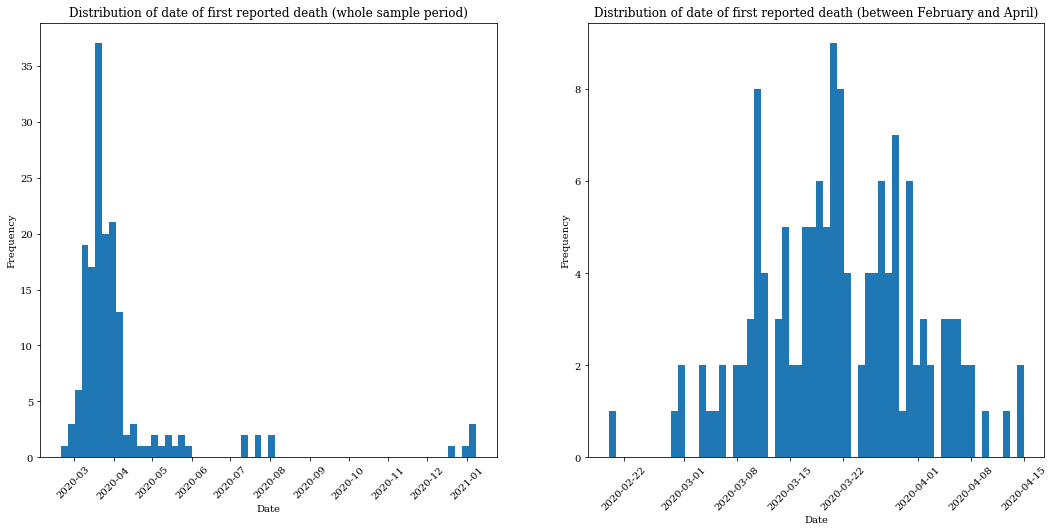

In [91]:
# Histogram showing distribution of first death
histo_first_death = deaths[deaths.first_death != 0] 
# ZOOM in to the previous histogram between february and april
histo_first_death_1 = histo_first_death[(deaths['date'] < '2020-04-16')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8), gridspec_kw={'width_ratios': [1, 1]})
axes[0].set_title('Distribution of date of first reported death (whole sample period)')
axes[1].set_title('Distribution of date of first reported death (between February and April)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Frequency')
hist_first_death = histo_first_death.date.hist(xrot=45, bins = 60, grid = False, ax=axes[0])
hist_first_death_1 = histo_first_death_1.date.hist(xrot=45, bins = 60, grid = False, ax=axes[1])


# DESCRIPTIVE STATS

q1 = math.floor(histo_first_death['date'].astype('int64').quantile(0.25))
median = math.floor(histo_first_death['date'].astype('int64').median())
q3 = math.floor(histo_first_death['date'].astype('int64').quantile(0.75))
mini = math.floor(histo_first_death['date'].astype('int64').min())
maxi = math.floor(histo_first_death['date'].astype('int64').max())


q1_death = np.datetime64(q1, "ns")
median_death = np.datetime64(median, "ns")
q3_death = np.datetime64(q3, "ns")
mini_death = np.datetime64(mini, "ns")
maxi_death = np.datetime64(maxi, "ns")


print(q1_death,median_death,q3_death,maxi_death,mini_death)

C:\Users\lisbe\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


2020-03-02T00:00:00.000000000 2020-03-11T00:00:00.000000000 2020-03-17T00:00:00.000000000 2020-02-19T00:00:00.000000000 2020-11-10T00:00:00.000000000


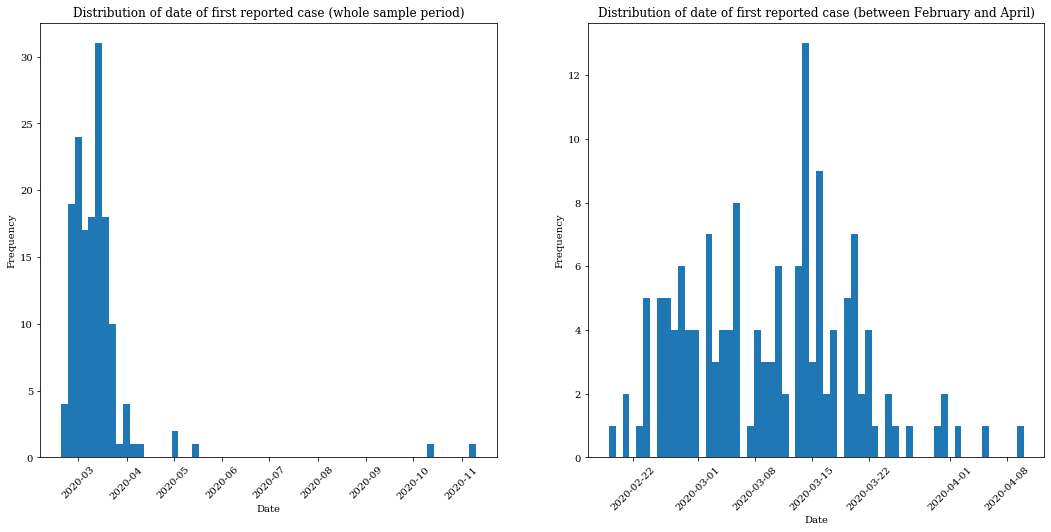

In [53]:
# Histogram showing distribution of first case
histo_first_case = cases[cases.first_case != 0] 
# ZOOM in to the previous histogram between february and april
histo_first_case_1 = histo_first_case[(histo_first_case['date'] > '2020-02-14') & (cases['date'] < '2020-04-16')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8), gridspec_kw={'width_ratios': [1, 1]})
axes[0].set_title('Distribution of date of first reported case (whole sample period)')
axes[1].set_title('Distribution of date of first reported case (between February and April)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Frequency')
hist_first_case = histo_first_case.date.hist(xrot=45, bins = 60, grid = False, ax=axes[0])
hist_first_case_1 = histo_first_case_1.date.hist(xrot=45, bins = 60, grid = False, ax=axes[1])

# DESCRIPTIVE STATS

q1 = math.floor(histo_first_case['date'].astype('int64').quantile(0.25))
median = math.floor(histo_first_case['date'].astype('int64').median())
q3 = math.floor(histo_first_case['date'].astype('int64').quantile(0.75))
mini = math.floor(histo_first_case['date'].astype('int64').min())
maxi = math.floor(histo_first_case['date'].astype('int64').max())


q1_case = np.datetime64(q1, "ns")
median_case = np.datetime64(median, "ns")
q3_case = np.datetime64(q3, "ns")
mini_case = np.datetime64(mini, "ns")
maxi_case = np.datetime64(maxi, "ns")

print(q1_case,median_case,q3_case, mini_case, maxi_case)

# Figure 1

In [94]:
reg['f_gatherings'] = reg['f_gatherings'].replace(np.nan, 0)
reg['f_close_work'] = reg['f_close_work'].replace(np.nan, 0)
reg['f_close_school'] = reg['f_close_school'].replace(np.nan, 0)
reg['f_stay_home'] = reg['f_stay_home'].replace(np.nan, 0)
reg['f_cancel_event'] = reg['f_cancel_event'].replace(np.nan, 0)
reg['f_close_transport'] = reg['f_close_transport'].replace(np.nan, 0)
reg['f_close_move'] = reg['f_close_move'].replace(np.nan, 0)
measures = reg.copy()

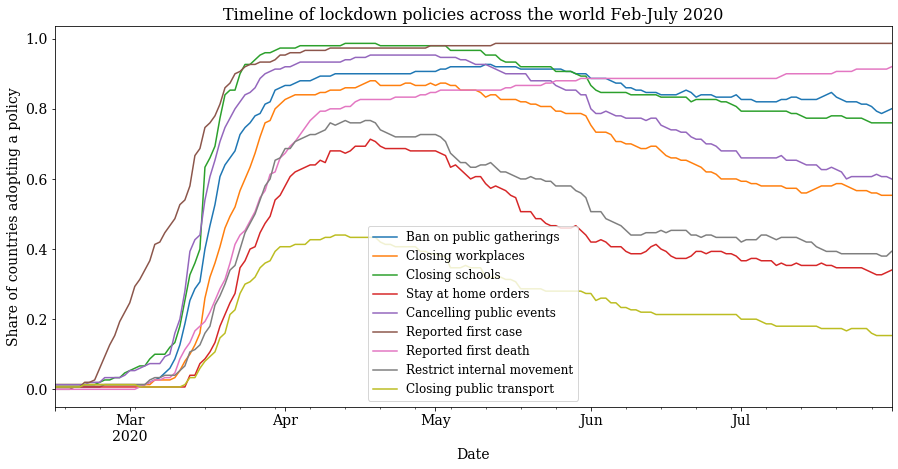

In [95]:
measures['treated_case']=0
for i in range(400):
    measures['treated_case']= np.where((measures.treated_case.shift(1)==1) & (measures.country==measures.country.shift(1))| (measures.first_case==1),1,0)

measures['treated_death']=0
for i in range(400):
    measures['treated_death']= np.where((measures.treated_death.shift(1)==1) & (measures.country==measures.country.shift(1))| (measures.first_death==1),1,0)
   
    
#measures = measures[(measures['date'] < '2020-08-01')]
measures['gatherings'] = pd.to_numeric(np.where(measures['gatherings']>1,1,0))
measures['close_work'] = pd.to_numeric(np.where(measures['close_work']>1,1,0))
measures['close_school'] = pd.to_numeric(np.where(measures['close_school']>1,1,0))
measures['stay_home'] = pd.to_numeric(np.where(measures['stay_home']>1,1,0))
measures['cancel_event'] = pd.to_numeric(np.where(measures['cancel_event']>1,1,0))
measures['close_transport'] = pd.to_numeric(np.where(measures['close_transport']>1,1,0))
measures['close_move'] = pd.to_numeric(np.where(measures['close_move']>1,1,0))


plt.rcParams["font.family"] = "Serif"
fig_death,ax = plt.subplots(figsize=(15,7))
ax.set_title('Timeline of lockdown policies across the world Feb-July 2020',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
measures.groupby(['date']).mean()['gatherings'].plot(ax=ax)
measures.groupby(['date']).mean()['close_work'].plot(ax=ax)
measures.groupby(['date']).mean()['close_school'].plot(ax=ax)
measures.groupby(['date']).mean()['stay_home'].plot(ax=ax)
measures.groupby(['date']).mean()['cancel_event'].plot(ax=ax)
measures.groupby(['date']).mean()['treated_case'].plot(ax=ax)
measures.groupby(['date']).mean()['treated_death'].plot(ax=ax)
measures.groupby(['date']).mean()['close_move'].plot(ax=ax)
measures.groupby(['date']).mean()['close_transport'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Ban on public gatherings','Closing workplaces','Closing schools','Stay at home orders', 'Cancelling public events', 'Reported first case','Reported first death','Restrict internal movement','Closing public transport'],fontsize=12)
plt.savefig('Figure_1.png')

C:\Users\lisbe\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lisbe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\lisbe\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

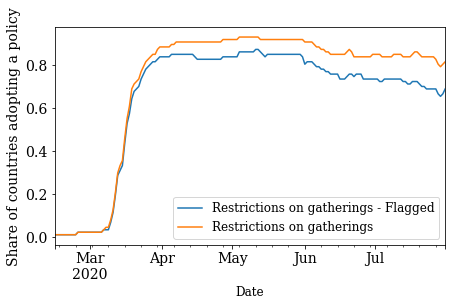

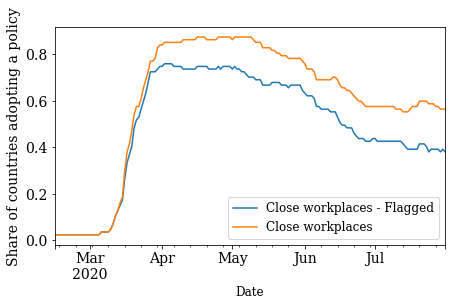

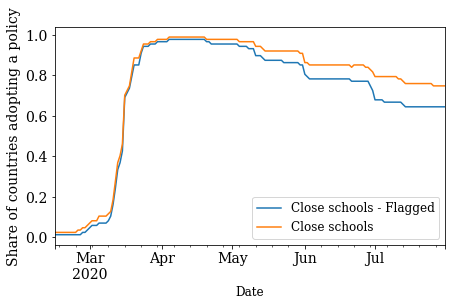

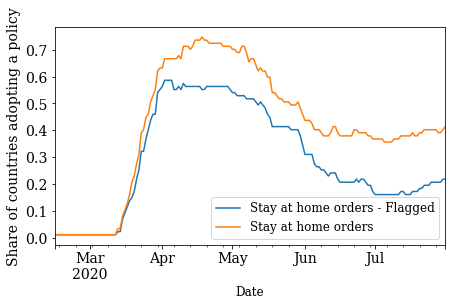

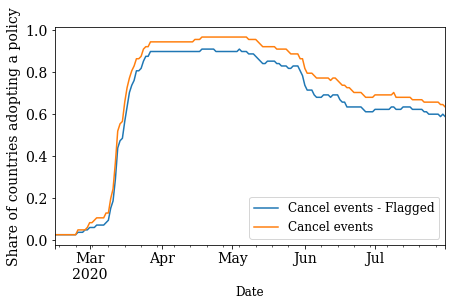

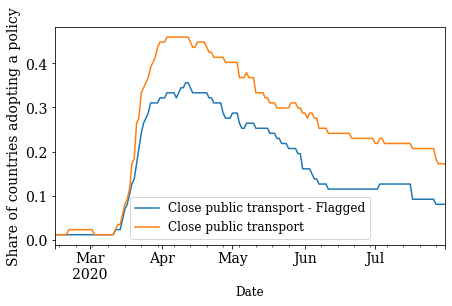

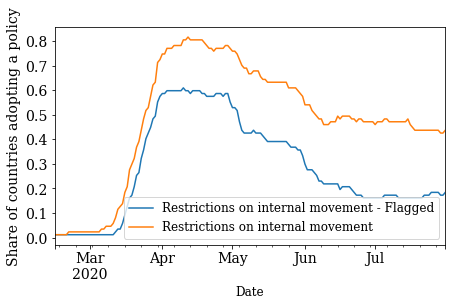

In [104]:
sample = ['Afghanistan', 'Angola', 'Argentina', 'Austria' ,'Bangladesh', 'Belarus', 'Benin', 'Bolivia' ,'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Chile', 'Colombia', 'Costa Rica', 'Cote d\'Ivoire', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hungary', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia','New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Puerto Rico', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Slovenia', 'South Africa', 'Switzerland', 'Tajikistan', 'Tanzania', 'Togo', 'Trinidad and Tobago', 'Turkey', 'Uganda', 'Ukraine', 'Uruguay', 'Venezuela', 'Zambia', 'Zimbabwe']

measures = measures[measures['country'].isin(sample)]

#measures = measures[(measures['date'] < '2020-08-01')]
measures['gatherings_flagged'] = pd.to_numeric(measures['gatherings'])*pd.to_numeric(measures['f_gatherings'])
measures['close_work_flagged'] = pd.to_numeric(measures['close_work'])*pd.to_numeric(measures['f_close_work'])
measures['close_school_flagged'] = pd.to_numeric(measures['close_school'])*pd.to_numeric(measures['f_close_school'])
measures['stay_home_flagged'] = pd.to_numeric(measures['stay_home'])*pd.to_numeric(measures['f_stay_home'])
measures['cancel_event_flagged'] = pd.to_numeric(measures['cancel_event'])*pd.to_numeric(measures['f_cancel_event'])
measures['close_transport_flagged'] = pd.to_numeric(measures['close_transport'])*pd.to_numeric(measures['f_close_transport'])
measures['close_move_flagged'] = pd.to_numeric(measures['close_move'])*pd.to_numeric(measures['f_close_move'])


plt.rcParams["font.family"] = "Serif"
fig_gatherings,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['gatherings_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['gatherings'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Restrictions on gatherings - Flagged','Restrictions on gatherings'],fontsize=12)
plt.savefig('Gatherings_flagged.png')


plt.rcParams["font.family"] = "Serif"
fig_close_work,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['close_work_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['close_work'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Close workplaces - Flagged','Close workplaces'],fontsize=12)
plt.savefig('Close_work_flagged.png')


plt.rcParams["font.family"] = "Serif"
fig_close_school,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['close_school_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['close_school'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Close schools - Flagged','Close schools'],fontsize=12)
plt.savefig('Close_school_flagged.png')


plt.rcParams["font.family"] = "Serif"
fig_stay_home,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['stay_home_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['stay_home'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Stay at home orders - Flagged','Stay at home orders'],fontsize=12)
plt.savefig('Stay_home_flagged.png')


plt.rcParams["font.family"] = "Serif"
fig_cancel_event,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['cancel_event_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['cancel_event'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Cancel events - Flagged','Cancel events'],fontsize=12)
plt.savefig('Cancel_events_flagged.png')


plt.rcParams["font.family"] = "Serif"
fig_close_transport,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['close_transport_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['close_transport'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Close public transport - Flagged','Close public transport'],fontsize=12)
plt.savefig('Close_transport_flagged.png')


plt.rcParams["font.family"] = "Serif"
fig_close_move,ax = plt.subplots(figsize=(7,4))
#ax.set_title('Timeline of lockdown policies across the world',fontsize=16)
ax.set_ylabel('Share of countries adopting a policy',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
measures.groupby(['date']).mean()['close_move_flagged'].plot(ax=ax)
measures.groupby(['date']).mean()['close_move'].plot(ax=ax, xlabel='Date',fontsize=14).legend(['Restrictions on internal movement - Flagged','Restrictions on internal movement'],fontsize=12)
plt.savefig('Close_move_flagged.png')

In [ ]:
# FULL SAMPLE

fig_full, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('Change in mobility relative to baseline')
ax.set_title('Mobility across categories - Full sample')
reg.groupby(['t']).mean()['retail_and_recreation'].plot(ax=ax)
reg.groupby(['t']).mean()['grocery_and_pharmacy'].plot(ax=ax)           
reg.groupby(['t']).mean()['parks'].plot(ax=ax) 
reg.groupby(['t']).mean()['transit_stations'].plot(ax=ax)
reg.groupby(['t']).mean()['workplaces'].plot(ax=ax) 
reg.groupby(['t']).mean()['residential'].plot(ax=ax, xlabel='Relative time').legend(['Retail and recreation','Grocery stores and pharmacies','Parks','Transit stations','Workplaces','Residential'])  
plt.axvline(x=0, color='red')

# RULE OUT LOOKING AT FIRST DEATH AS THE EVENT VARIABLE

fig_death, ax = plt.subplots(figsize=(15,7))
reg.groupby(['t_death']).mean()['retail_and_recreation'].plot(ax=ax)
reg.groupby(['t_death']).mean()['grocery_and_pharmacy'].plot(ax=ax)            
reg.groupby(['t_death']).mean()['parks'].plot(ax=ax)  
reg.groupby(['t_death']).mean()['transit_stations'].plot(ax=ax)  
reg.groupby(['t_death']).mean()['workplaces'].plot(ax=ax)  
reg.groupby(['t_death']).mean()['residential'].plot(ax=ax)  
plt.axvline(x=0, color='red')


# SPLIT DATA SET BETWEN CONTROL AND TREATMENT GROUP

treatment_date = reg[reg.first_case != 0] 
treatment_date = treatment_date[['country','date']].dropna()
treated = treatment_date[treatment_date['date'] < '2020-03-18']
treated = treated['country'].to_list()
non_treated = treatment_date[treatment_date['date'] > '2020-03-17']
non_treated = non_treated['country'].to_list()

t_group = reg[reg['country'].isin(treated)]
c_group = reg[reg['country'].isin(non_treated)]

# PLOT TREATMENT GROUP VS CONTROL GROUP FOR ALL TYPES OF MOBILITY

fig_recreation, ax = plt.subplots(figsize=(15,7))
ax.set_title('Mobility in retail and recreation - Treatment vs. control group')
ax.set_ylabel('Change in mobility relative to baseline')
t_group.groupby(['t']).mean()['retail_and_recreation'].plot(ax=ax, color='purple')
c_group.groupby(['t']).mean()['retail_and_recreation'].plot(ax=ax, xlabel='Relative time', color='pink').legend(['Treatment group','Control group']) 
plt.axvline(x=0, color='red')

fig_grocery, ax = plt.subplots(figsize=(15,7))
ax.set_title('Mobility in grocery stores and pharmacies - Treatment vs. control group')
ax.set_ylabel('Change in mobility relative to baseline')
t_group.groupby(['t']).mean()['grocery_and_pharmacy'].plot(ax=ax)
c_group.groupby(['t']).mean()['grocery_and_pharmacy'].plot(ax=ax, xlabel='Relative time').legend(['Treatment group','Control group'])  
plt.axvline(x=0, color='red')

fig_parks, ax = plt.subplots(figsize=(15,7))
ax.set_title('Mobility in parks - treatment vs. control group')
ax.set_ylabel('Change in mobility relative to baseline')
t_group.groupby(['t']).mean()['parks'].plot(ax=ax)
c_group.groupby(['t']).mean()['parks'].plot(ax=ax, xlabel='Relative time').legend(['Treatment group','Control group']) 
plt.axvline(x=0, color='red')

fig_stations, ax = plt.subplots(figsize=(15,7))
ax.set_title('Mobility in transit stations - Treatment vs. control group')
ax.set_ylabel('Change in mobility relative to baseline')
c_group.groupby(['t']).mean()['transit_stations'].plot(ax=ax)
t_group.groupby(['t']).mean()['transit_stations'].plot(ax=ax, xlabel='Relative time').legend(['Treatment group','Control group']) 
plt.axvline(x=0, color='red')

fig_work, ax = plt.subplots(figsize=(15,7))
ax.set_title('Workplace mobility - Treatment vs. control group')
ax.set_ylabel('Change in mobility relative to baseline')
t_group.groupby(['t']).mean()['workplaces'].plot(ax=ax)
c_group.groupby(['t']).mean()['workplaces'].plot(ax=ax, xlabel='Relative time').legend(['Treatment group','Control group']) 
plt.axvline(x=0, color='red')

fig_residential, ax = plt.subplots(figsize=(15,7))
ax.set_title('Residential mobility - Treatment vs. control group')
ax.set_ylabel('Change in mobility relative to baseline')
t_group.groupby(['t']).mean()['residential'].plot(ax=ax)
c_group.groupby(['t']).mean()['residential'].plot(ax=ax, xlabel='Relative time').legend(['Treatment group','Control group'])   
plt.axvline(x=0, color='red')

In [101]:
reg['country'].nunique()

150

In [ ]:
# CREATING SUBSAMPLES FOR STATA

# FULL SAMPLE

reg.to_stata('reg.dta')  

# BALANCED SAMPLE

reg_balanced = reg[(reg.t < 22) & (reg.t > -8) ]
reg_balanced.country.value_counts()

# Don't worry about the three countries that have less than 29 observations, it is because our data starts too late.
print_full(reg_balanced.country.value_counts())
reg_balanced.to_stata('reg_balanced.dta') 

# create dow fixed effects

just_dummies = pd.get_dummies(reg['dow'])
reg = pd.concat([reg, just_dummies], axis=1)      
reg.drop(['Sunday'], inplace=True, axis=1)

# create democracy interactions

reg['democracy'] = pd.to_numeric(reg['democracy'], downcast="float")
reg['dictatorship'] = pd.to_numeric(reg['dictatorship'], downcast="float")
reg['yr_sch'] = pd.to_numeric(reg['yr_sch'], downcast="float")
reg['stringency'] = pd.to_numeric(reg['stringency'], downcast="float")

reg['demXcases'] = reg['log_cases']*reg['democracy']
reg['dicXcases'] = reg['log_cases']*reg['dictatorship']

reg['demXstringency'] = reg['democracy']*reg['stringency']
reg['dicXstringency'] = reg['dictatorship']*reg['stringency']

# create education interactions

reg['eduXcases'] = reg['yr_sch']*reg['log_cases']
reg['eduXstringency'] = reg['yr_sch']*reg['stringency']


# Create dummies for events

cases['d_7'] =  pd.to_numeric(np.where(cases['t']==-7, 1, 0), downcast="float")
cases['d_6'] = pd.to_numeric(np.where(cases['t']==-6, 1, 0), downcast="float")
cases['d_5'] = pd.to_numeric(np.where(cases['t']==-5, 1, 0), downcast="float")
cases['d_4'] = pd.to_numeric(np.where(cases['t']==-4, 1, 0), downcast="float")
cases['d_3'] = pd.to_numeric(np.where(cases['t']==-3, 1, 0), downcast="float")
cases['d_2'] = pd.to_numeric(np.where(cases['t']==-2, 1, 0), downcast="float")
cases['d_1'] = pd.to_numeric(np.where(cases['t']==-1, 1, 0), downcast="float")
cases['d_0'] = pd.to_numeric(np.where(cases['first_case']==1,1,0), downcast="float")
cases['d1'] = pd.to_numeric(np.where(cases['t']==1, 1, 0), downcast="float")
cases['d2'] = pd.to_numeric(np.where(cases['t']==2, 1, 0), downcast="float")
cases['d3'] = pd.to_numeric(np.where(cases['t']==3, 1, 0), downcast="float")
cases['d4'] = pd.to_numeric(np.where(cases['t']==4, 1, 0), downcast="float")
cases['d5'] = pd.to_numeric(np.where(cases['t']==5, 1, 0), downcast="float")
cases['d6'] = pd.to_numeric(np.where(cases['t']==6, 1, 0), downcast="float")
cases['d7'] = pd.to_numeric(np.where(cases['t']==7, 1, 0), downcast="float")
cases['d8'] = pd.to_numeric(np.where(cases['t']==8, 1, 0), downcast="float")
cases['d9'] = pd.to_numeric(np.where(cases['t']==9, 1, 0), downcast="float")
cases['d10'] = pd.to_numeric(np.where(cases['t']==10, 1, 0), downcast="float")
cases['d11'] = pd.to_numeric(np.where(cases['t']==11, 1, 0), downcast="float")
cases['d12'] = pd.to_numeric(np.where(cases['t']==12, 1, 0), downcast="float")
cases['d13'] = pd.to_numeric(np.where(cases['t']==13, 1, 0), downcast="float")
cases['d14'] = pd.to_numeric(np.where(cases['t']==14, 1, 0), downcast="float")

# Creating a balanced sample

cases['delete']= np.where((cases.t==0) & (cases.first_case==0),0,1)
cases = cases[cases.delete != 0]

del cases['first_case']
del cases['delete']

cases = cases.groupby("country").filter(lambda x: len(x) == 27) 

#reg = reg.set_index(["country","date"])

# create quadratic and cubic variable of t

reg['t2'] = reg['t']**2
reg['t3'] = reg['t']**3